In [1]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.phonon.plotter import PhononBSPlotter
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.analysis.diffraction.xrd import *
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
mp_key = "nPJf5FFhl6DXPpC4NQSxAL5REFwR0nb0" #C'est le clé api de materials project personnel
mp_id = "mp-23040"

In [3]:
with MPRester(mp_key) as m:
    struct = m.get_structure_by_material_id(mp_id)
    struct_prim = m.get_structure_by_material_id(mp_id)
    conv_struct = SpacegroupAnalyzer(struct_prim).get_conventional_standard_structure()
    ops_sym = SpacegroupAnalyzer(conv_struct).get_space_group_operations()
analyse = SpacegroupAnalyzer(struct)

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

## Objectif: détermination des 3 premiers pics de diffraction de $Ca_{2}PI$

L'objectif de cet tâche est de déterminer les 3 premiers pics de diffraction de $Ca_{2}PI$ avec un rayonnement X incident Cu Kα ayant une longeur d'onde de λ=1.5406 Å.

Lorsque le faisceau de rayons rentre dans le crystel, elle est diffracté par le résau d'atomes présent dedans produisant une résau d'interférence. Les endroits ou les interférencecs sont constructives est déterminée par l'équation de Bragg:
$$
     2\cdot d\cdot sin(\theta )=n \cdot \lambda 
$$
(d étant la distance entre plans dans le résau 3D, donnée par: $d=\frac{2\cdot \pi }{\left\| h\cdot a^{*} + k\cdot b^{*} + l\cdot c^{*} \right\|}$)
Quand l'angle $\theta$ est tel que cet condition est remplis, des pics de diffraction apparaissent, l'intensité desquelles dépends du facteur de forme atomique et la multiciplité des plans de réflexion.

### Résultats

Pic de diffraction 0 :
2θ° =  11.913959342485414
intensité relatice du pic:  16.199743665739902
indices (h,k,l) et milticipltié du pic:  {'hkl': (0, 0, 0, 3), 'multiplicity': 2}
distance interplanaire:  7.422117721736494 Å


Pic de diffraction 1 :
2θ° =  23.959198880975404
intensité relatice du pic:  8.840737959886733
indices (h,k,l) et milticipltié du pic:  {'hkl': (0, 0, 0, 6), 'multiplicity': 2}
distance interplanaire:  3.711058860868247 Å


Pic de diffraction 2 :
2θ° =  24.149766310752575
intensité relatice du pic:  31.354678016057836
indices (h,k,l) et milticipltié du pic:  {'hkl': (1, 0, -1, 1), 'multiplicity': 12}
distance interplanaire:  3.6822043603934005 Å




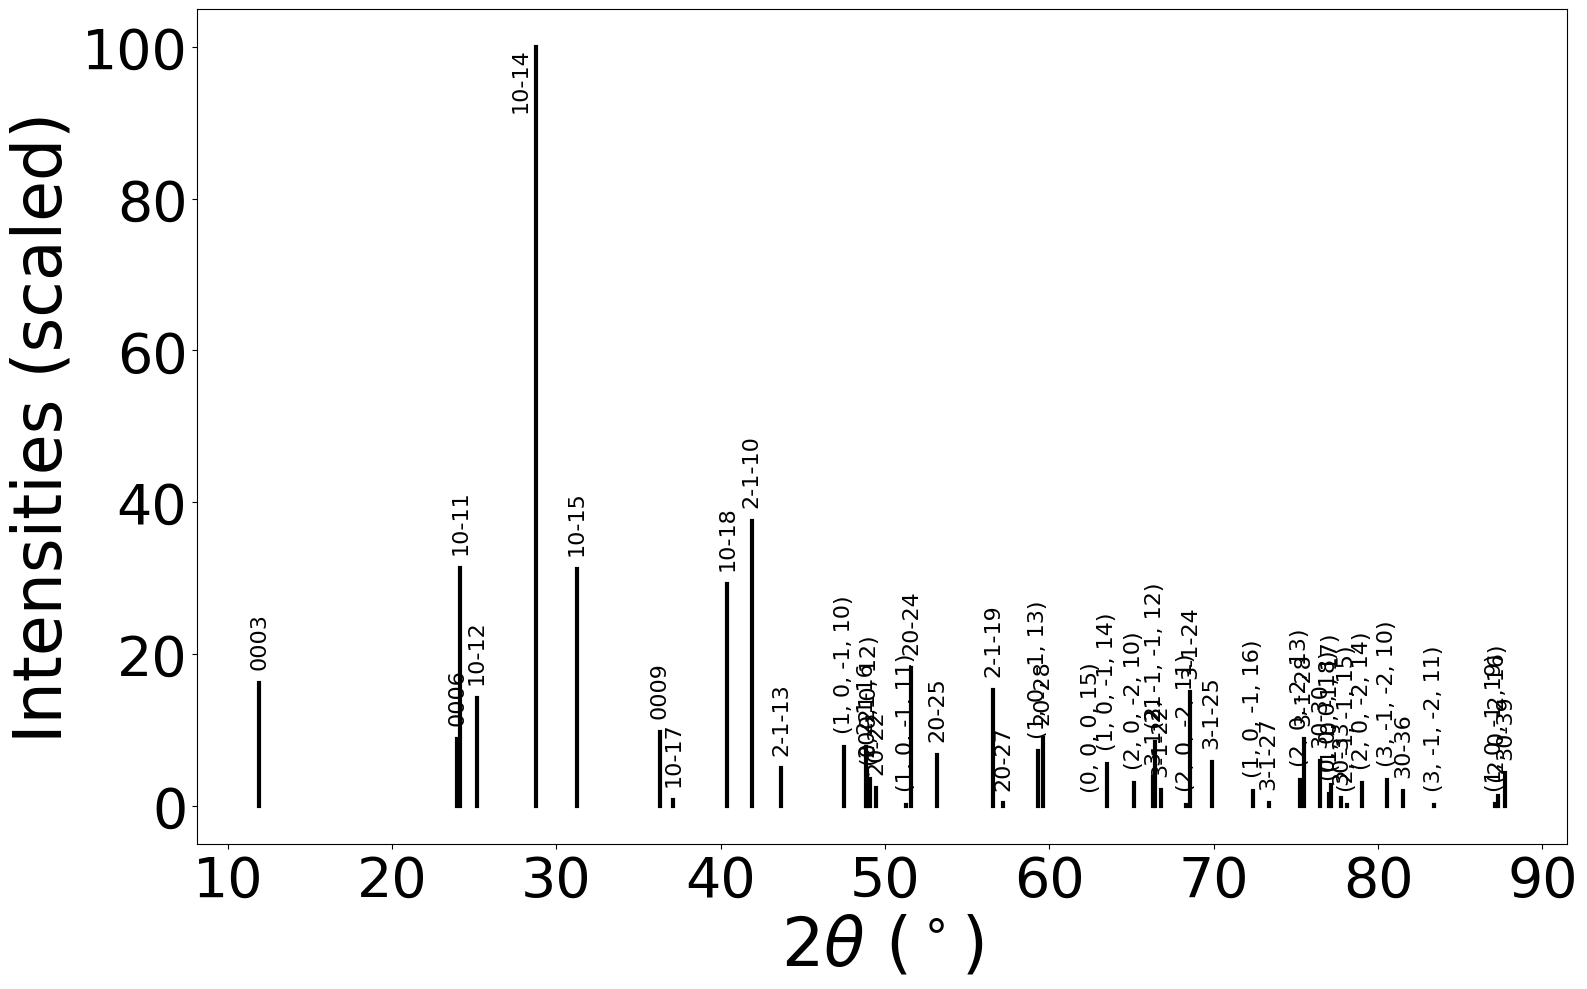

In [4]:
xrd = XRDCalculator(wavelength = 'CuKa1')
pattern = xrd.get_pattern(conv_struct) 
xrd.get_plot(conv_struct)
indice = pattern.hkls

for i in range(3):
    print("Pic de diffraction" , i , ":")
    print("2θ° = " , pattern.x[i])
    print("intensité relatice du pic: " , pattern.y[i])
    print("indices (h,k,l) et milticipltié du pic: " , indice[i][0])
    print("distance interplanaire: " , pattern.d_hkls[i], "Å")
    print("\n")

Notes extra:

Vérifier angles de diffraction avec site web Materials Project: https://next-gen.materialsproject.org/materials/mp-23040?material_ids=mp-23040 => Spectra => Diffraction Patterns => sélectionner CuKα1.544 Å => Zoomer sur le graphe => posed souris au dessus des pics marqués par lignes verticales noires (valeur obtenu devrait être proche)

==> Correspondent bien +- aux valeurs obtenues avec le code